In [1]:
import numpy as np
import pandas as pd
import sympy as sym
from sympy import symbols, simplify, trigsimp, expand
from matplotlib import pyplot as plt


from Calculation.geometry_util import pol2cart, cart2pol, r_ort, tet_ort, phi_ort
from Calculation.material import StaticMaterial, Material, LayeredFilm, print_film_parameters, print_Hext_parameters

In [2]:
from Calculation.StationaryState import StationaryState   
        
st_state = StationaryState()

In [4]:
from Calculation.LinearDouble import LinearDouble

linear_double = LinearDouble()

In [5]:
def Hk2KuJ(H1k1, H1k2, H2k, Ms, t):
    Ku_2ord = H1k2*Ms/4.
    Ku_1ord = (H1k1*Ms/2. - 2*Ku_2ord) + 2*np.pi*(Ms**2)
    J = (t/2.)*Ms*(H2k - H1k1)
    return Ku_1ord, Ku_2ord, J

In [6]:
mu0 = 1.2566370621219e-6

uB_SI = 9.274009994e-24 #J/T
uB_CGS = 9.274009994e-21 #erg/G

hb_SI = 1.054571817e-34 # J*s
hb_CGS = 1.054571817e-27 #erg*s

g0_SI = uB_SI/hb_SI #1/(T*s)
g0_CGS = uB_CGS/hb_CGS #1/(G*s)

In [7]:
H1k1 = 7.5e3
H1k2 = 6.5e3
H2k = 12.5e3

thickness = 12e-7
Ms_hyst = 620.

Ku_1ord, Ku_2ord, J_hyst = Hk2KuJ(H1k1, H1k2, H2k, Ms_hyst, thickness)

#setting up film parameters
layer1 = Material(
    StaticMaterial(
        Ms=Ms_hyst, 
        gamma=2.11*g0_CGS, alpha=0.1,
        Ku_1ord=Ku_1ord,
        Ku_2ord=Ku_2ord,
        t=thickness
    )
)
layer2 = Material(
    StaticMaterial(
        Ms=Ms_hyst, 
        gamma=2.11*g0_CGS, alpha=0.1,
        Ku_1ord=Ku_1ord,
        Ku_2ord=Ku_2ord,
        t=thickness
    )
)


film_inst = LayeredFilm(layer1, layer2, J_hyst)


print_film_parameters(film_inst)

---------------------------------------------------
film parametrs:
	J = 1.86

	layer1 parameters:
		Ku_1ord1 = 2.73e+06
		Ku_2ord1 = 1.01e+06
		Ms1 = 620.0
		t1 = 1.20e-06
		gamma1 = 1.86e+07
		alpha1 = 0.1

	layer2 parameters:
		Ku_1ord2 = 2.73e+06
		Ku_2ord2 = 1.01e+06
		Ms2 = 620.0
		t2 = 1.20e-06
		gamma2 = 1.86e+07
		alpha2 = 0.1
---------------------------------------------------


<IPython.core.display.Javascript object>


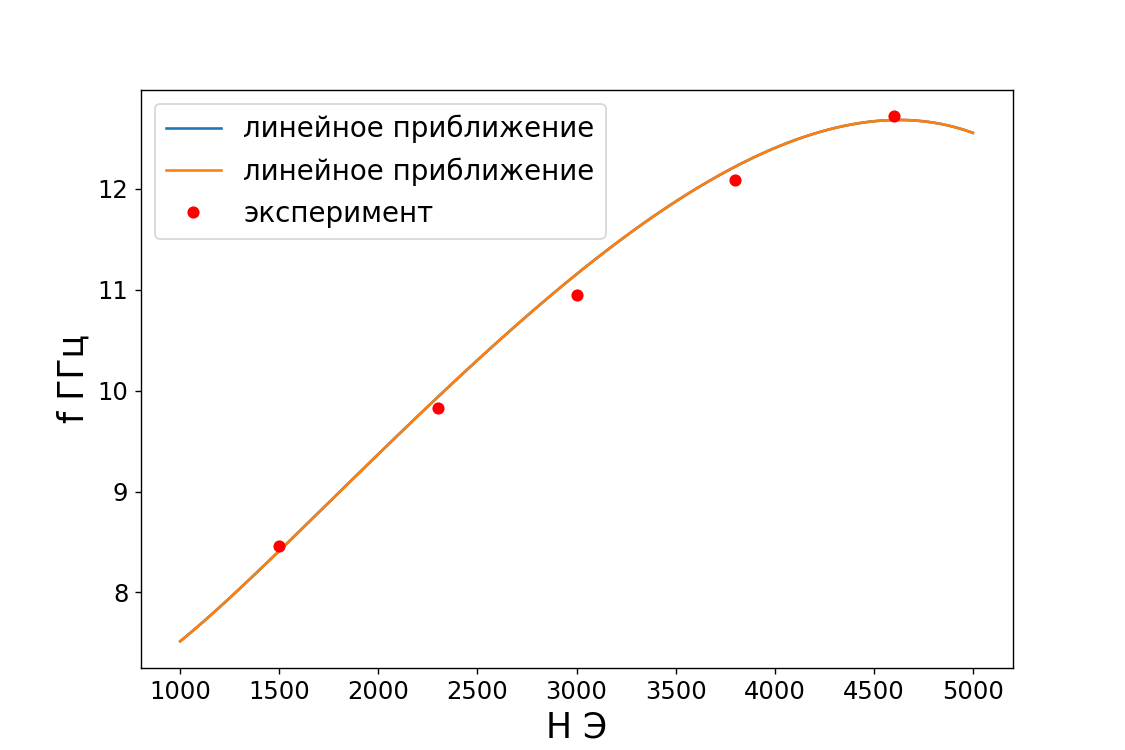

Text(0, 0.5, 'f ГГц')

In [8]:
%matplotlib notebook
plt.figure(figsize=(9,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot()
plt.xlabel("H Э", fontsize=20)
plt.ylabel("f ГГц", fontsize=20)

In [14]:
#%matplotlib notebook

Htet = np.deg2rad(63.)
Habses = np.linspace(1e3, 5e3, 100)


res_freq = []

for Habs in Habses:
    Hext = pol2cart(Habs, Htet, 0.)
    
    angles = st_state.get_angles_optimize(
        film_inst,
        Hext,
        tol=1e-8
    )
    
    res_freq.append(
        linear_double.f_res_lamb[1](
            Habs, Htet,
            film_inst.l1.st.Ms, angles[0], angles[2],
            H1k1, H1k2, H2k,
            film_inst.l1.st.t,
            film_inst.l1.st.gamma
        )
    )
    

plt.plot(Habses, np.array(res_freq)*1e-9, label='линейное приближение')
plt.grid()
    
  

In [15]:
Hxl = [
    1.5,
    2.3,
    3,
    3.8,
    4.6
]

fxl = [
    8.46,
    9.83,
    10.95,
    12.09,
    12.72
]
plt.plot(np.array(Hxl)*1e3, fxl, 'ro', label='эксперимент')
plt.legend(fontsize=16)